In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [2]:
data_frame = pd.read_csv('magic04.data', header=None)
data_frame.columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
data_frame.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Here we will predict the future sample weather class is g for `gamma` or h for `hadron`. 

In [3]:
data_frame['class'] = (data_frame['class'] == 'g').astype(int)
data_frame.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


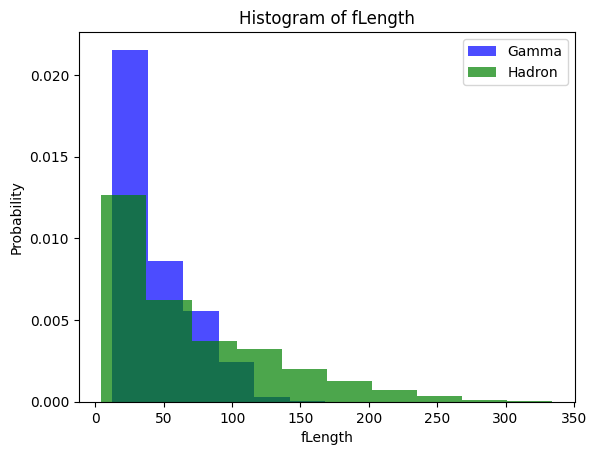

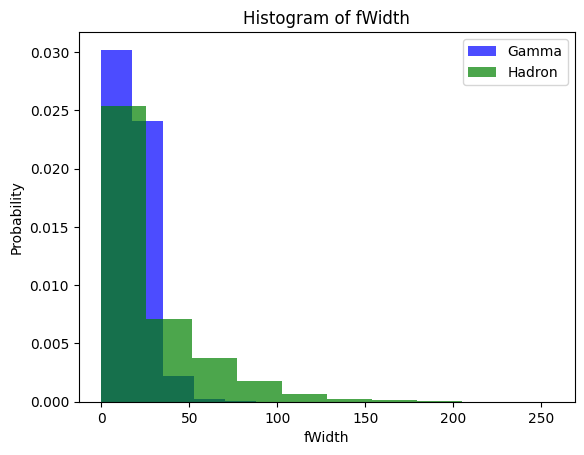

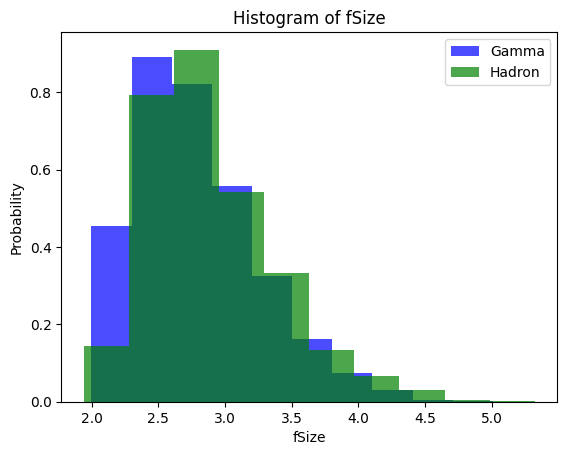

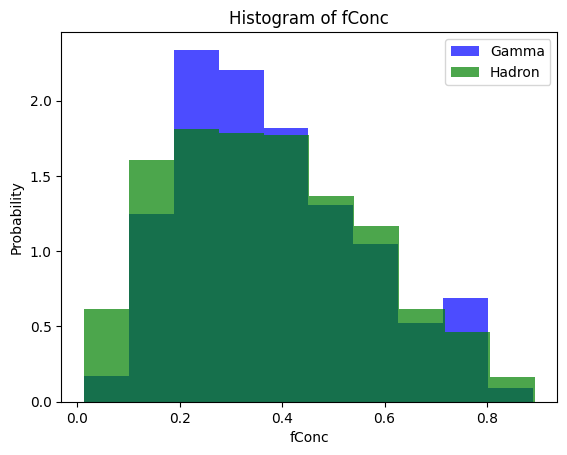

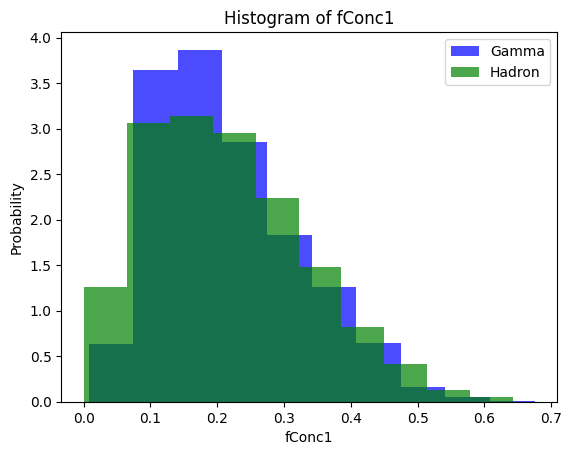

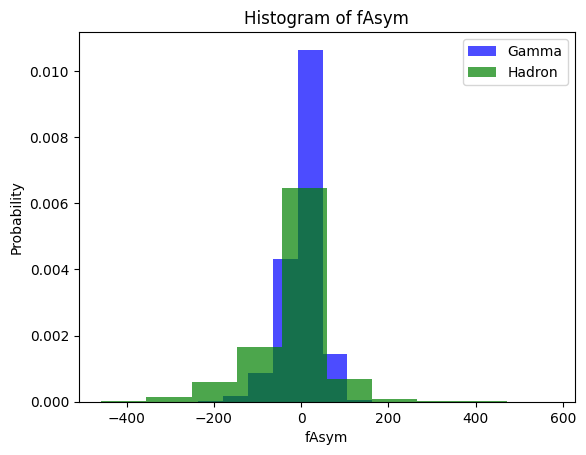

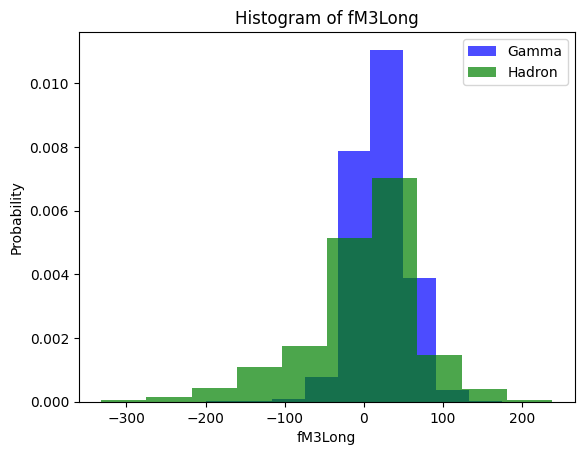

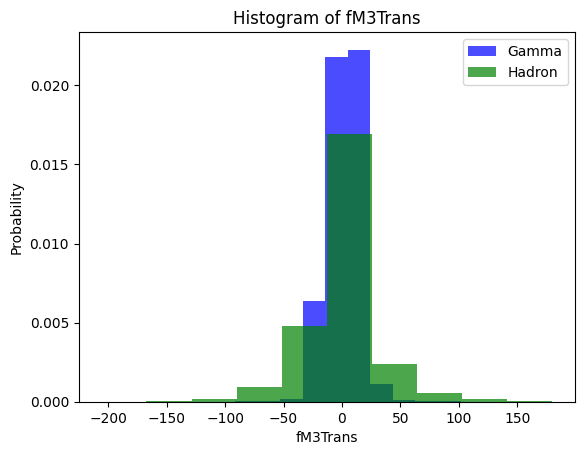

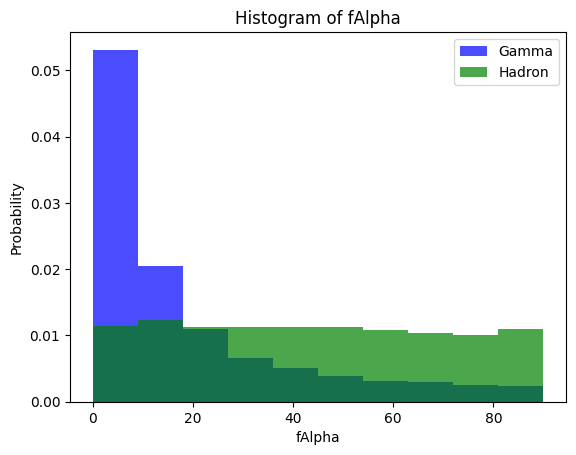

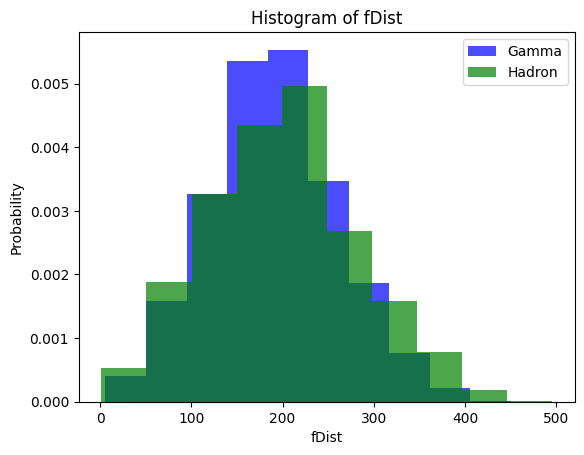

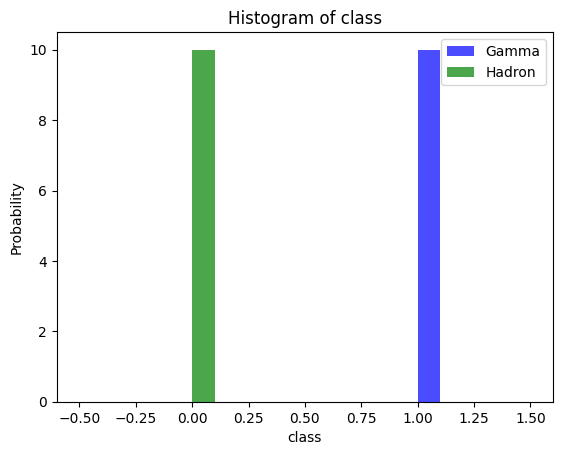

In [4]:
# Plot histograms for each feature

for column in data_frame.columns:
    plt.hist(data_frame[data_frame['class'] == 1][column], color="blue", alpha=0.7, label='Gamma', density=True)
    plt.hist(data_frame[data_frame['class'] == 0][column], color="green", alpha=0.7, label='Hadron', density=True)
    plt.xlabel(column)
    plt.ylabel('Probability')
    plt.title('Histogram of ' + column)
    plt.legend()
    plt.show()


# Train, Validation and Test Data

In [5]:
train, valid, test = np.split(data_frame.sample(frac=1),[int(0.6*len(data_frame)), int(0.8*len(data_frame))])
print(train.shape, valid.shape, test.shape)

(11412, 11) (3804, 11) (3804, 11)


It means that we have 60% of the data for training, 20% for validation and 20% for testing.

In [6]:
def scale_dataset(data_frame, oversample=False):
    X = data_frame[data_frame.columns[:-1]].values
    y = data_frame[data_frame.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [7]:
train, X_train, Y_train =scale_dataset(train, oversample=True)
valid, X_valid, Y_valid=scale_dataset(valid, oversample=False)
test, X_test, Y_test=scale_dataset(test, oversample=False)

# K-Nearest Neighbors

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
Y_pred = knn_model.predict(X_test)

In [11]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1355
           1       0.85      0.85      0.85      2449

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [12]:
Y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [13]:
Y_test

array([1, 0, 1, ..., 0, 0, 1])

# Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [20]:
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50      1355
           1       0.73      0.90      0.81      2449

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [24]:
lg_model = LogisticRegression()
lg_model.fit(X_train, Y_train)

LogisticRegression()

In [26]:
y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50      1355
           1       0.73      0.90      0.81      2449

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804

